# How PSO Topologies Behave In `pyswarms`


In particle swarm optimization (PSO) a topology is a "rule" which indicates how to particles are connected with each other. These connection guide the information flow in the swarm. In the `pyswarms` library there exist five different topologies:

- **The Star topology**: All the particles are connected with each other. A swarm with a Star topology is often called a FIPS (Fully Informed Particle Swarm). This means that every particle has knowledge of the best position that has been found yet in the swarm.


- **The Ring topology**: The particles are connected to the $n$ nearest particles.

    - The VonNeumann topology: This is a special variant of the Ring topology. It connects to a certain amount of neighbours depending on the dimension and range.


- **The Pyramid topology**: The particles are connected in $n$-dimensional simplices (triangles, tetraeder etc.)


- **The Random topology**: The particles are connected to $n$ randomly chosen neighbours.


The `pyswarms` library also offers the possiblity to choose whether the neighbours are static or dynamic. That is whether the neighbours are assigned only at the start or every iteration. This feature is only available for the Ring, Random and Pyramid topologies. The Star and the VonNeumann topology are always static. In the follwing section we will take a look at the different topologies and how they behave when they traverse the Goldstein-Price function.

In [1]:
import sys
# Change directory to access the pyswarms module
sys.path.append('../')

In [2]:
print('Running on Python version: {}'.format(sys.version))

Running on Python version: 3.6.5 (default, Mar 31 2018, 19:45:04) [GCC]


In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Import from package
import pyswarms as ps
import pyswarms.backend.topology as top
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher, Designer

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2



## Setup

First, we are going to setup a plotting functions so we don't have to reapeat the same code everytime we plot the optimization:

In [4]:
def plot_optimization(options, topology):

    bounds = (np.array([-5, -5]), np.array([5, 5]))
    optimizer = ps.single.GeneralOptimizerPSO(n_particles=12,
                                              dimensions=2,
                                              options=options,
                                              topology=topology,
                                              bounds=bounds)
    
    optimizer.optimize(fx.himmelblau_func, iters=100)
    
    m = Mesher(func=fx.himmelblau_func,
               delta=0.1,
               limits=[(-5, 5), (-5, 5)],
               levels=np.arange(0, 2000, 200))
    
    d = Designer(limits=[(-5, 5), (-5, 5), (0, 2000)],
                 label=['x-axis', 'y-axis', 'z-axis'])
    
    animation = plot_contour(pos_history=optimizer.pos_history,
                             designer=d,
                             mesher=m,
                             mark=([3, -2.805118, -3.779310, 3.584428],
                                   [2, 3.131312, -3.283186, -1.848126]))
    
    pos_history_3d = m.compute_history_3d(optimizer.pos_history)
    animation3d = plot_surface(pos_history=pos_history_3d,
                               mesher=m,
                               designer=d,
                               mark=([3, -2.805118, -3.779310, 3.584428],
                                     [2, 3.131312, -3.283186, -1.848126],
                                     [0, 0, 0, 0]))
    
    # Enables us to view it in a Jupyter notebook
    HTML(animation.to_html5_video())
    HTML(animation3d.to_html5_video())

## The Star topology

The first topology that we are going to visualise is the Star topology. As previously mentioned, every particle has full information about the best performances of the other particles.

INFO:pyswarms.single.general_optimizer:================================
Optimization finished!
Final cost: 0.0000
Best value: [2.999988630146073, 2.0000083177584385]

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpjfc80jm5.m4v']
INFO:matplotlib.animation:MovieWriter -- Error running proc:
b''
b''


ValueError: Invalid file object: <_io.BufferedReader name=61>

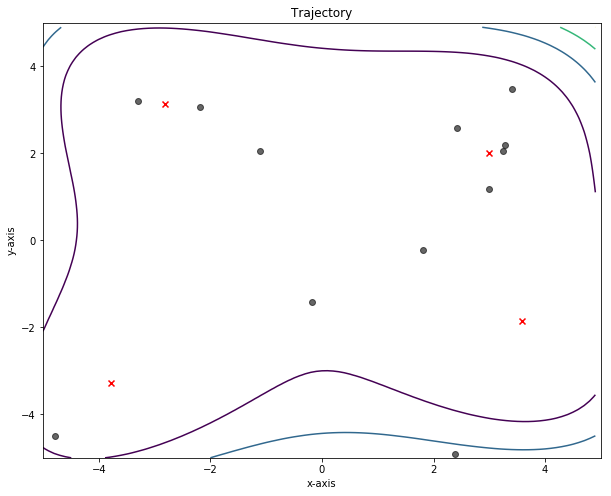

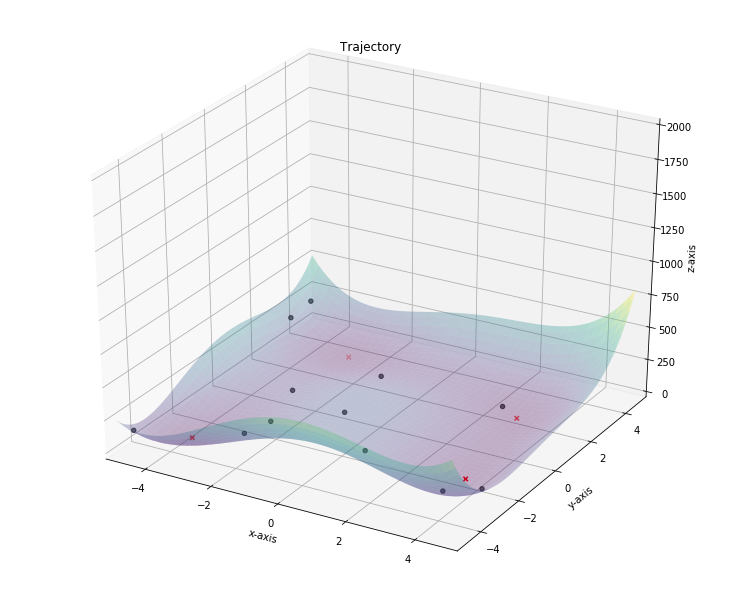

In [5]:
# Set up the Star topology optimizer
options = {"c1": 1.49617, "c2": 1.49617, "w": 0.72984}
topology = top.Star()

plot_optimization(options, topology)
